# CS445 Lab 5: PCA

## Chosen Dataset: Forest Fires

**Dataset Explanation**  
The Forest Fires dataset, sourced from the UCI Machine Learning Repository, contains meteorological data used to **predict the burned area of forest fires** in the **northeast region of Portugal** (Cortez, et al.). It includes features such as temperature, wind speed, rainfall, and various fire weather indices.

## Initial Data Visualization Setup

We begin by importing the necessary libraries and loading the dataset to explore its structure.


In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA


In [59]:
# Read the data
df = pd.read_csv('forestfires.csv')

# Display a preview of the data
print(df.head())

# Set font globally before plotting anything
plt.rcParams.update({
    'font.size': 14,
    'font.family': 'Times New Roman'
})


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


## Convert Dataset to a numpy Array and Calculate the Covariance Matrix

In [60]:
# Drop non-numeric columns ('month', 'day', etc.)
df_numeric = df.select_dtypes(include=[np.number])

# Compute the covariance matrix
covariance_matrix = np.cov(df_numeric.values, rowvar=False)

# Display the covariance matrix 
print(covariance_matrix)

[[ 5.35356784e+00  1.53540102e+00 -2.68720106e-01 -7.17001897e+00
  -4.93132818e+01  6.55124976e-02 -6.88667101e-01  3.21760155e+00
   7.79260942e-02  4.47760635e-02  9.33573051e+00]
 [ 1.53540102e+00  1.51265500e+00 -3.14390566e-01  6.12959756e-01
  -3.08690039e+01 -1.37321383e-01 -1.72133882e-01  1.24869926e+00
  -4.48221702e-02  1.20972216e-02  3.51313901e+00]
 [-2.68720106e-01 -3.14390566e-01  3.04716238e+01  1.35272459e+02
   4.52587277e+02  1.33849023e+01  1.38319965e+01 -2.71119330e+01
  -2.81718209e-01  9.26348342e-02  1.40983577e+01]
 [-7.17001897e+00  6.12959756e-01  1.35272459e+02  4.10195189e+03
   1.08385013e+04  8.91029647e+01  1.74639099e+02  7.71213591e+01
  -1.20879231e+01  1.41765463e+00  2.97592727e+02]
 [-4.93132818e+01 -3.08690039e+01  4.52587277e+02  1.08385013e+04
   6.15368355e+04  2.59185313e+02  7.14751694e+02 -1.58640438e+02
  -9.04300084e+01  2.63281311e+00  7.79803423e+02]
 [ 6.55124976e-02 -1.37321383e-01  1.33849023e+01  8.91029647e+01
   2.59185313e+02  

## Visualization 1: Covariance Matrix Visualization

**Purpose and Rationale**  
The purpose of this heatmap is to visualize the covariance matrix of the forestfires dataset as a heatmap. This allows us to better understand the natures of and the relationships between the numerical values within this dataset.

**Insights:**
1. The overlap of DC values represents the highest level of positive covariance. Which makes sense since a variable is always perfectly covariant with itself.
2. The overlap of DC and RH values have the lowest level of negative covariance
3. The overlap of the y value and the rain value have the closest zero covariance

**Interpretation:**  
he negative covariance between DC and RH aligns with real-world expectations, where drier conditions (higher DC) often come with lower humidity. Variables with near-zero covariance, like y and rain, indicate independence and may not be useful in predicting one another


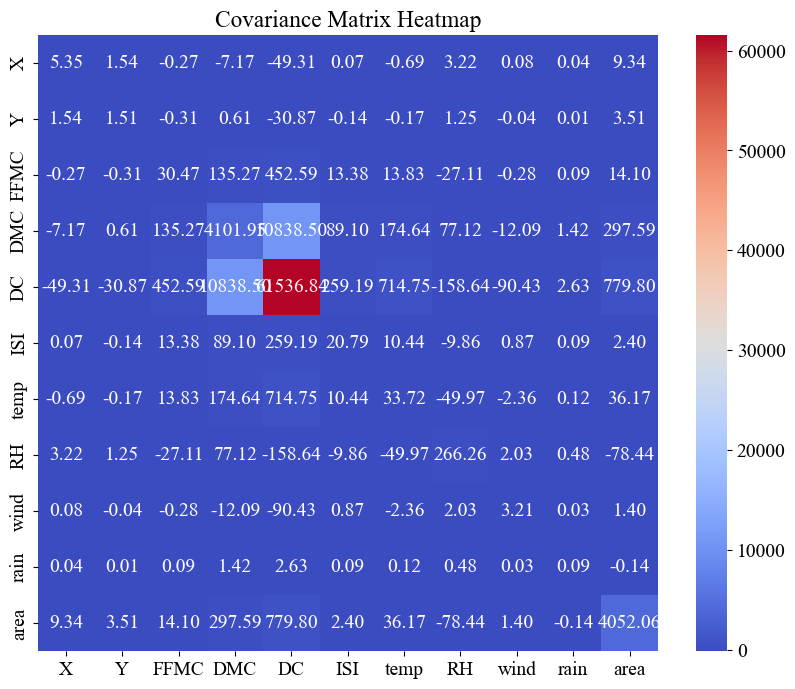

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(covariance_matrix, 
            xticklabels=df_numeric.columns, 
            yticklabels=df_numeric.columns, 
            cmap='coolwarm', 
            annot=True, fmt='.2f')
plt.title("Covariance Matrix Heatmap")
plt.savefig("Lab5+FisherBachmanRhodes+CovMatHeatmap.png", dpi=300, bbox_inches='tight')
plt.show()



## Visualization 2: Eigenvalues and Eigenvectors Bar Chart

**Purpose and Rationale**  
The purpose of this bar chart is to visualize the eigenvalues of the forestfires dataset principle components. Each bar represents the amount of variance explained by a single principal component. This visualization provides a quick and intuitive understanding of how much information each component contributes.

**Insights:**
1. The bar for principle component 1 is by far the tallest
2. The bars become exponentially smaller as the component number increases
3. principle component 4 is the last visible bar

**Interpretation:**  
The first three principle components contain the most variance in data and thus contain the most valuable information about the dataset. This implies that dimensionality can be reduced from the original number of variables to just 3 or 4 components without substantial loss of information. 


/var/folders/kk/nr80b8_s6yn60fdftc7kshn40000gn/T/ipykernel_70864/3382493224.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Component', y='Eigenvalue', data=df_eigen, palette='viridis')


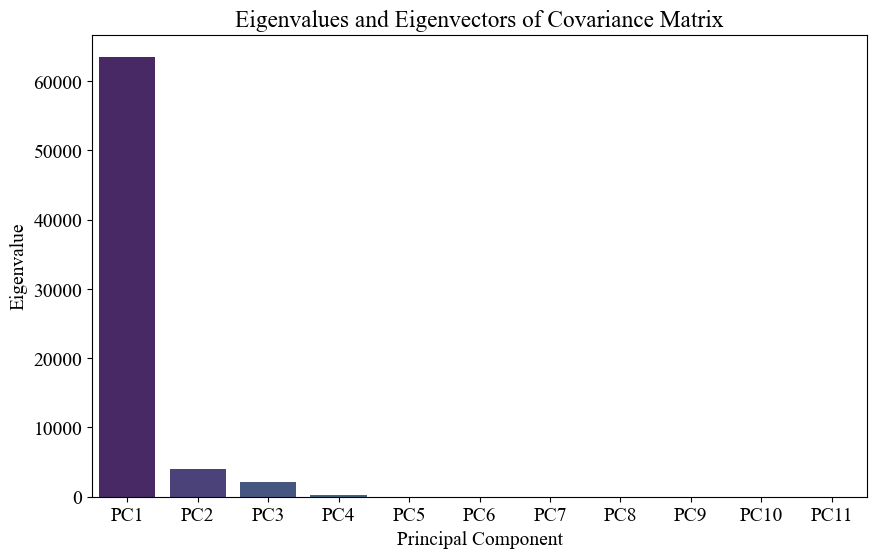

In [62]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) 

# Create a DataFrame for plotting
df_eigen = pd.DataFrame({
    'Component': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Eigenvalue': eigenvalues
})

# Plot eigenvalues
plt.figure(figsize=(10, 6))
sns.barplot(x='Component', y='Eigenvalue', data=df_eigen, palette='viridis')
plt.title("Eigenvalues and Eigenvectors of Covariance Matrix")
plt.ylabel("Eigenvalue")
plt.xlabel("Principal Component")
plt.savefig("Lab5+FisherBachmanRhodes+EigenBar.png", dpi=300, bbox_inches='tight')
plt.show()

## Visualization 3: PCA Scree Plot

**Purpose and Rationale**  
The purpose of this scree plot is to visualize the variance among the eigenvalues of the forestfires dataset principle components.  Using this scree plot we can still observe variance among the principle component values of the dataset without the unnecessary visual clutter of the previous heatmap. Additionally, in comparing the variance among eigen values of each principle component in a straitforward way such as this, it becomes much easier to reduce dataset dimensionality. This is done by removing principle components that contain less valuable information.

**Insights and Interpretation:**  
As we can observe from the below scree plot, the principle components gradually decrease in data variance as they go on. This means that to retain the most important information about the dataset, we should prioritize using the first few principle components over the last few.



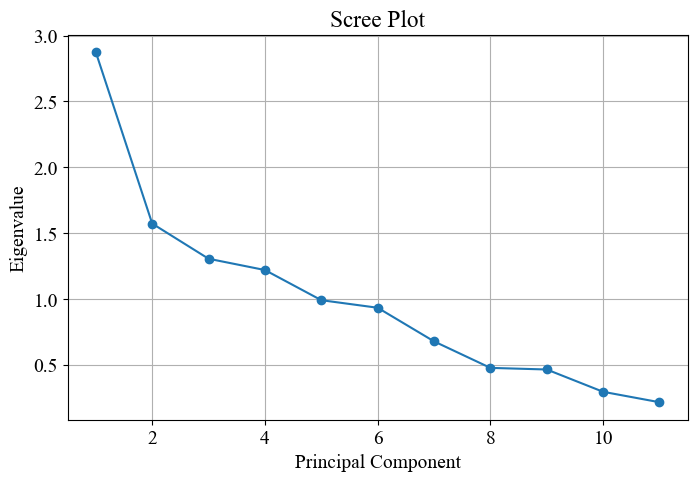

In [ ]:
# Standardize data (important for PCA)
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(df_numeric)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Scree plot (eigenvalues)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.savefig("Lab5+FisherBachmanRhodes+Scree.png", dpi=300, bbox_inches='tight')
plt.show()

## Visualization 4: PCA Biplot

**Purpose and Rationale**  
The purpose of this biplot is to visualize the the multidimensionality of the forest fires dataset as well as the overall flow of the first two principle component's values. We can view the flow as well as the direction and magnitude of value variance using the component eigenvectors.

**Insights:**
1. The x and y value arrows are the longest vectors among the data
2. The wind and area value arrows are the shortest vectors among the data

**Interpretation:**  
the x and y values of the dataset have the most influence over the second component. Conversely, the wind and area values of the dataset have the least influence over any of the principle components.

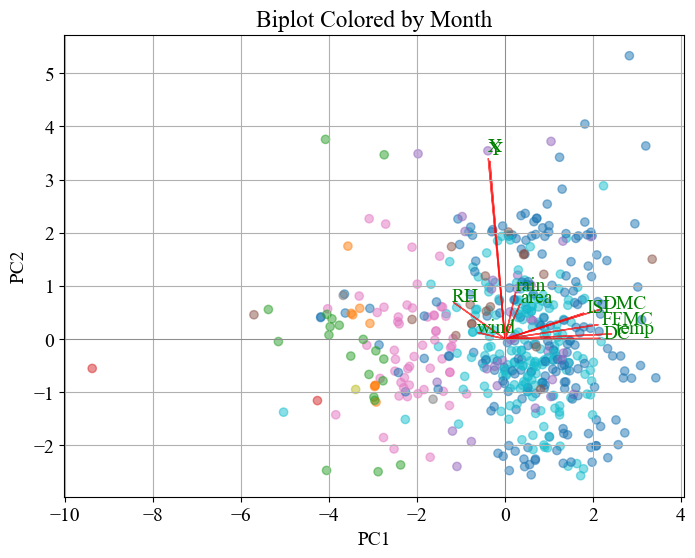

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode 'month' to numeric values for coloring
label_encoder = LabelEncoder()
colors = label_encoder.fit_transform(df['month'])  # Replace 'month' with any categorical column

# Project the data onto the first 2 principal components
pca = PCA(n_components=2)
pc_data = pca.fit_transform(scaled_data)

# Make a DataFrame for plotting
pc_df = pd.DataFrame(data=pc_data, columns=['PC1', 'PC2'])

# Biplot: plot scores and variable loadings
plt.figure(figsize=(8, 6))
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=colors, cmap='tab10', alpha=0.5)

# Plot arrows (loadings)
loadings = pca.components_.T
for i, col in enumerate(df_numeric.columns):
    plt.arrow(0, 0, loadings[i, 0]*5, loadings[i, 1]*5, color='r', alpha=0.7)
    plt.text(loadings[i, 0]*5.2, loadings[i, 1]*5.2, col, color='g')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot Colored by Month')
plt.grid(True)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.savefig("Lab5+FisherBachmanRhodes+Biplot.png", dpi=300, bbox_inches='tight')
plt.show()


## Visualization 5: PCA 3D Scatter plot

**Purpose and Rationale**  
The purpose of this 3D is to visualize the relationships between the first three principle componenents of the forestfires dataset. The first three principle comonents are used in this visualization because they contain the most valuable data variance information among the principle components.

**Insights:**
1. Datapoints cluster between -6 and 0 on the PC1 axis
2. Datapoints cluster between 1 and 5 on the PC2 axis
3. Datapoints cluster between -4 and 0 on the PC3 axis

**Interpretation:**  
This PCA 3D scatter plot confirms that the first three principal components successfully retain the majority of the dataset’s variance and reveal meaningful patterns. If clustering is evident, it could indicate distinct groups in the data (e.g., different fire conditions or weather patterns)

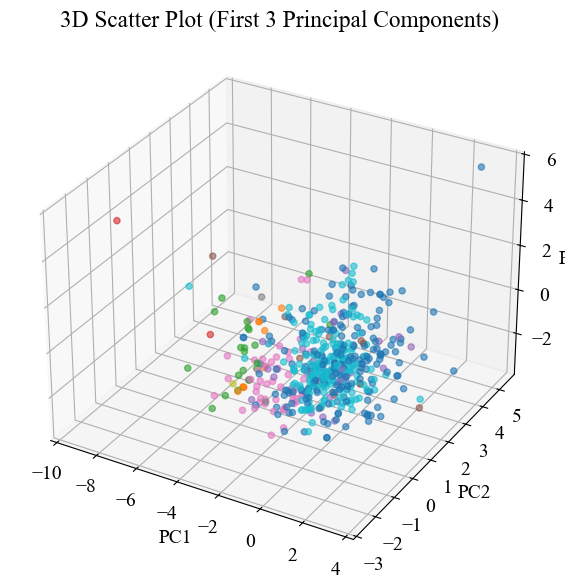

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode the 'month' column to numeric values for coloring
label_encoder = LabelEncoder()
colors = label_encoder.fit_transform(df['month'])  # Replace 'month' with any categorical column

# 3D PCA
pca = PCA(n_components=3)
pc3d = pca.fit_transform(scaled_data)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pc3d[:, 0], pc3d[:, 1], pc3d[:, 2],
                     c=colors, cmap='tab10', alpha=0.6)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot (First 3 Principal Components)')
plt.savefig("Lab5+FisherBachmanRhodes+3Dscatter.png", dpi=300, bbox_inches='tight')
plt.show()
